# Read Data

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data_raw=pd.read_csv("healthcare-dataset-stroke-data (1).csv")

In [3]:
data_raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data_raw.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2586,41175,Female,22.0,0,0,No,Govt_job,Urban,123.23,21.3,Unknown,0
1613,49789,Female,73.0,0,0,No,Govt_job,Urban,62.99,25.4,formerly smoked,0
3159,34356,Female,75.0,0,0,Yes,Private,Rural,108.72,29.2,formerly smoked,0
161,16590,Male,71.0,0,1,Yes,Private,Urban,81.76,NaN,smokes,1
631,13517,Male,59.0,0,0,Yes,Private,Urban,100.54,35.8,never smoked,0


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data_raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Clean Data

In [7]:
data_raw.drop(['id'],axis=1,inplace = True)

In [8]:
data_raw.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
data_raw.dropna(inplace=True)

data_raw.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
rows_to_drop = data_raw[data_raw['gender'] == 'Other'].index
data_raw = data_raw.drop(rows_to_drop)

In [11]:
rows_to_drop = data_raw[data_raw['age'] <= 16].index
data_raw = data_raw.drop(rows_to_drop)

In [12]:
data_raw.shape

(4130, 11)

In [13]:
data_raw.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000
mean,49.444794,0.109201,0.058596,107.332044,30.421719,0.050363
std,18.083134,0.311929,0.234895,46.744686,7.323256,0.218720
min,17.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,35.000000,0.000000,0.000000,77.192500,25.400000,0.000000
50%,50.000000,0.000000,0.000000,92.050000,29.200000,0.000000
75%,63.000000,0.000000,0.000000,115.007500,34.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Xử lí ngoại lai

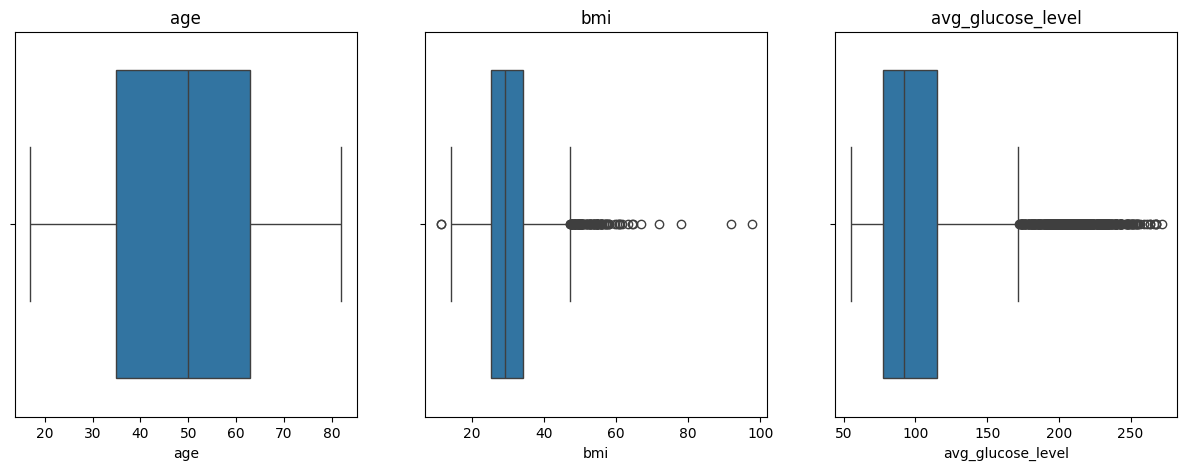

In [14]:
num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)
    
    sns.boxplot(x=data_raw[num_cols[i]])
    plt.title(num_cols[i])
plt.show()

In [15]:
def detect_outliers(data,column):
    q1 = data_raw[column].quantile(.25)
    q3= data_raw[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = data_raw.index[(data_raw[column] <lower_bound) | (data_raw[column] > upper_bound)]
    
    return ls

In [16]:
list = []
for column in num_cols:
    list.extend(detect_outliers(data_raw,column))
list = set(list) # set để loại bỏ các phần tử trùng lặp

In [17]:
data_raw=data_raw.drop(list)
data_raw.shape

(3499, 11)

# Data Visualization

In [18]:
data_raw['gender'].value_counts()

gender
Female    2163
Male      1336
Name: count, dtype: int64

In [19]:
data_raw['gender'].value_counts()

gender
Female    2163
Male      1336
Name: count, dtype: int64

<Axes: title={'center': 'Gender of patient'}, xlabel='gender'>

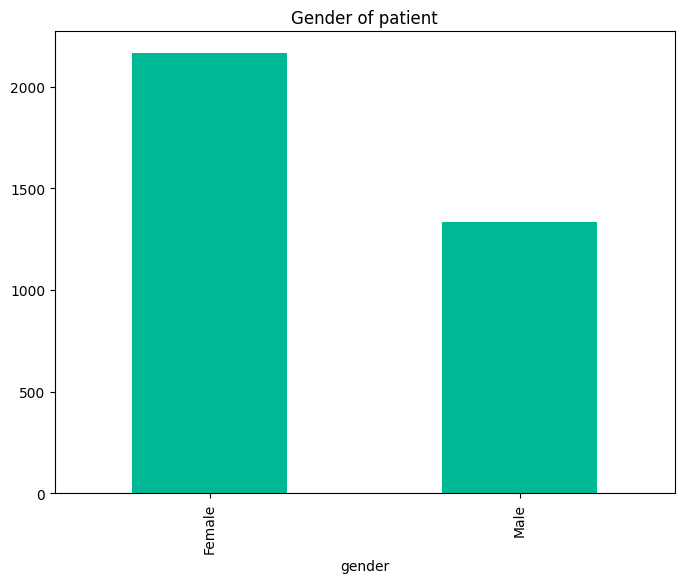

In [20]:
data_raw['gender'].value_counts().plot(figsize=(8,6),kind='bar',color='#00b894',title="Gender of patient")

Text(0.5, 1.0, "Distribution of patients' gender ")

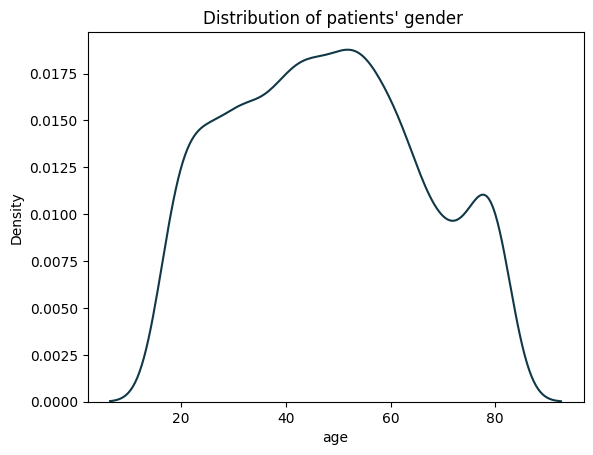

In [21]:

sns.kdeplot(data_raw['age'] , color = '#103846')
plt.title('Distribution of patients\' gender ')


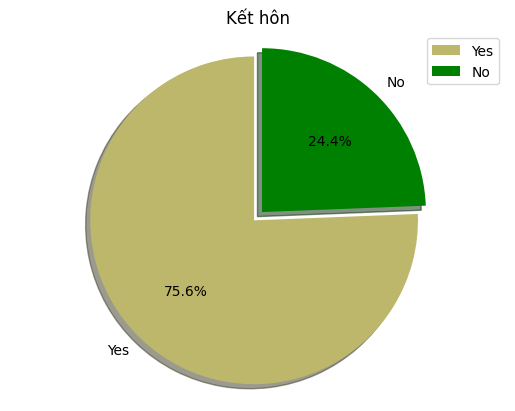

In [22]:
yes = data_raw['ever_married'][data_raw['ever_married']=='Yes'].count()
no = data_raw['ever_married'].value_counts().sum() - yes
labels = ['Yes','No']
sizes = [yes,no]
colors = ['#bdb76b', '#008000']
myexplode = [0.07,0]
plt.pie(sizes, labels=labels, colors=colors,explode=myexplode,shadow=True,autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Kết hôn')
plt.legend()
plt.show()

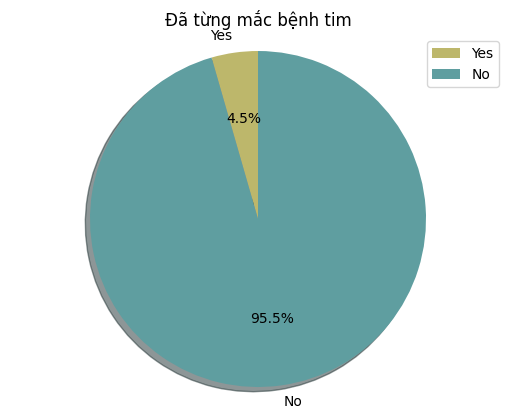

In [23]:
# Mắc bệnh tim
yes = data_raw['heart_disease'][data_raw['heart_disease']==1].count()
no = data_raw['heart_disease'].value_counts().sum() - yes
labels = ['Yes','No']
sizes = [yes,no]
colors = ['#bdb76b', '#5F9EA0']
plt.pie(sizes, labels=labels, colors=colors,shadow=True,autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Đã từng mắc bệnh tim')
plt.legend()
plt.show()

In [24]:
work_types = dict(data_raw['work_type'].value_counts())
fig = px.pie(names = work_types.keys(),values = work_types.values(),title = 'Loại công việc',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Private', 'Self-employed', 'Govt_job', 'Never_worked'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([2337,  623,  529,   10], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Loại công việc'}}
})

In [25]:
Residence_types = dict(data_raw['Residence_type'].value_counts())
fig = px.pie(names = Residence_types.keys(),values = Residence_types.values(),title = 'Nơi ở',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Urban', 'Rural'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([1781, 1718], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Nơi ở'}}
})

In [26]:
smoking_status = dict(data_raw['smoking_status'].value_counts())

fig = px.pie(names = smoking_status.keys(),values = smoking_status.values(),title = 'Tình trạng hút thuốc',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['never smoked', 'Unknown', 'formerly smoked', 'smokes'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([1466,  747,  653,  633], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Tình trạng hút thuốc'}}
})

In [27]:
hypertension = dict(data_raw['hypertension'].value_counts())

fig = px.pie(names = hypertension.keys(),values = hypertension.values(),title = 'Tăng huyết áp',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array([0, 1], dtype=int64),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([3206,  293], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Tăng huyết áp'}}
})

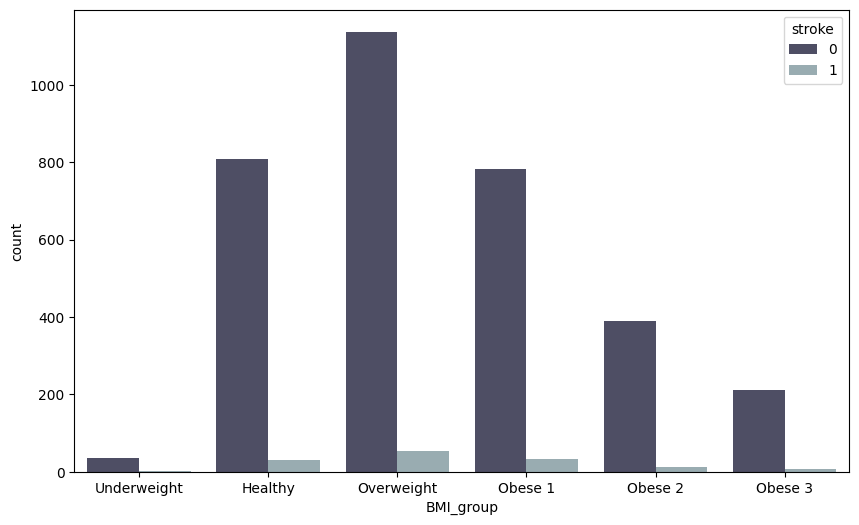

In [70]:
data=data_raw
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
labels = ['Underweight','Healthy','Overweight','Obese 1','Obese 2','Obese 3']
data['BMI_group'] = pd.cut(data_raw['bmi'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.countplot(x=data['BMI_group'], hue=data_raw['stroke'], palette='bone')
plt.show()

In [71]:
bins = [16, 24, 30, 34, 39, 44, 49, 54, 59 ,64, 69,74, 300 ]
labels = ['16-24','25-30','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75+']
data['AGE_group'] = pd.cut(data_raw['age'], bins=bins, labels=labels)

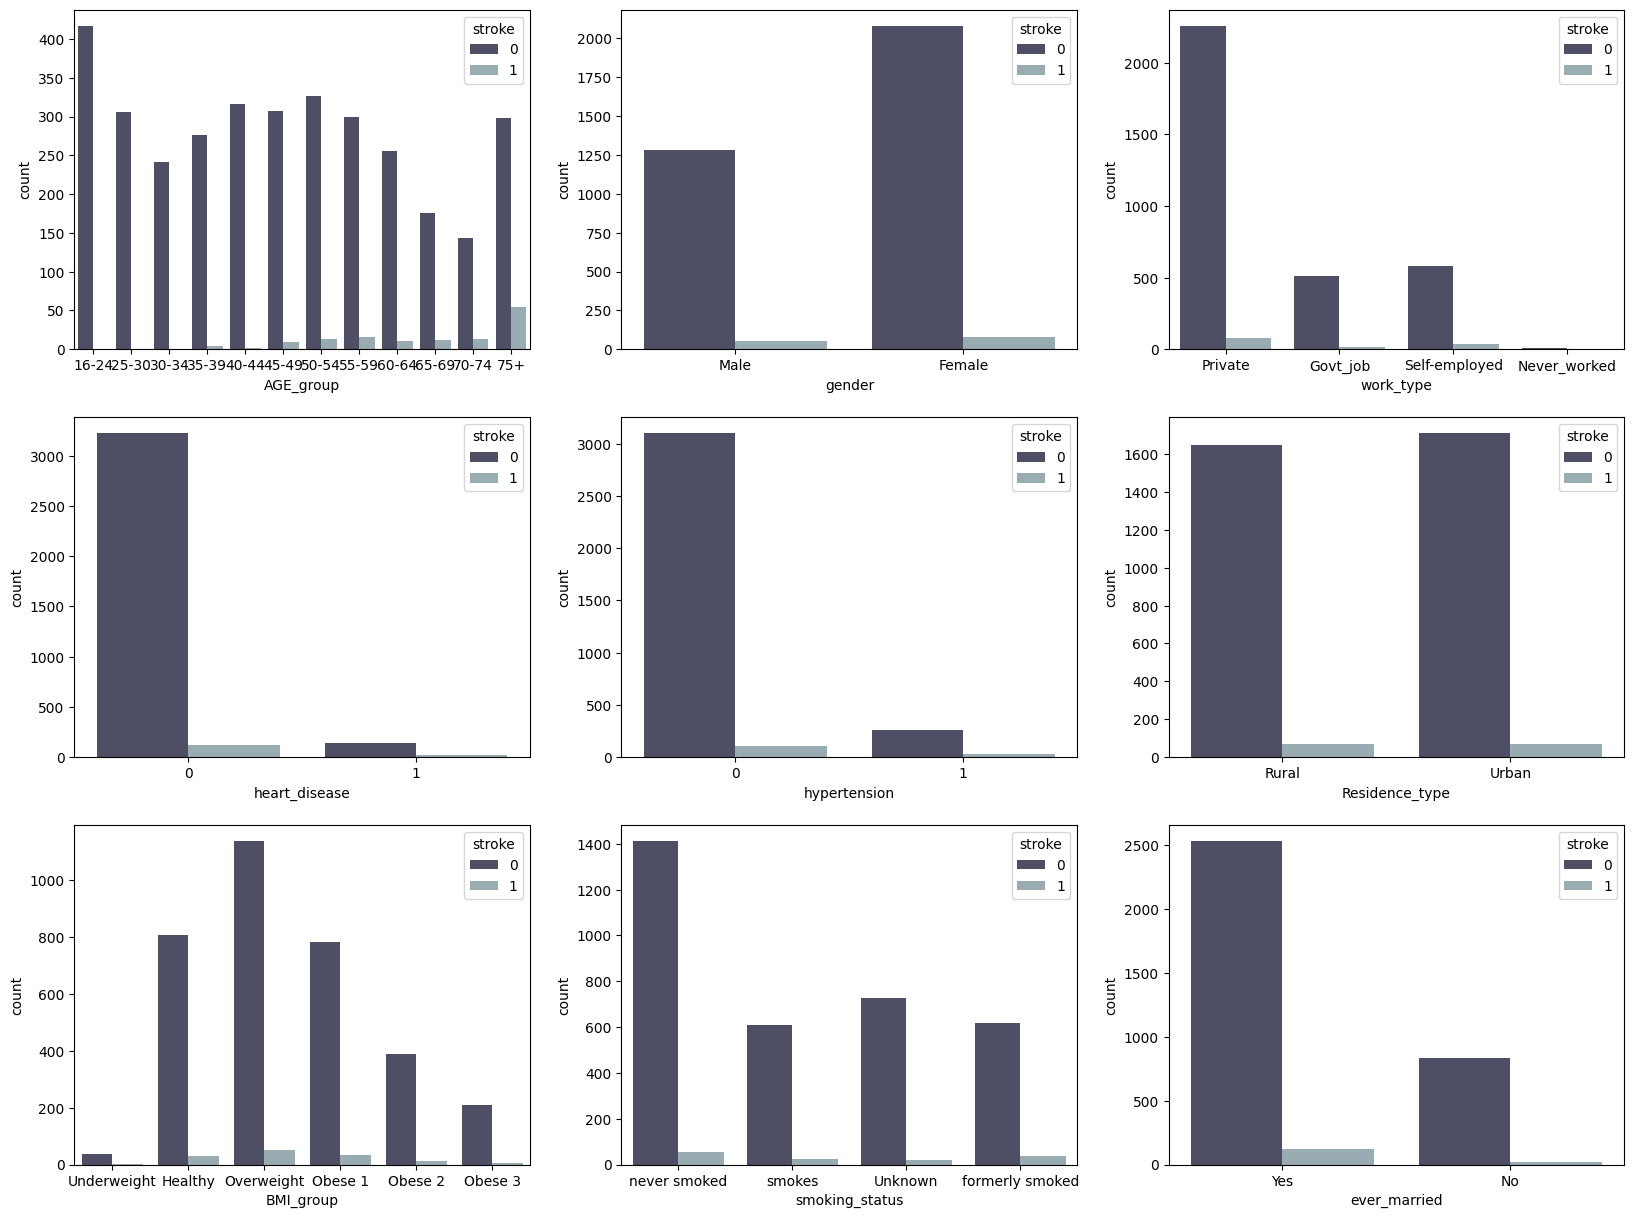

In [72]:
cols = ['AGE_group','gender','work_type','heart_disease','hypertension','Residence_type','BMI_group','smoking_status','ever_married']
plt.figure(figsize=(20,15))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    
    sns.countplot(x=data_raw[cols[i]],hue = data_raw['stroke'],palette = 'bone')



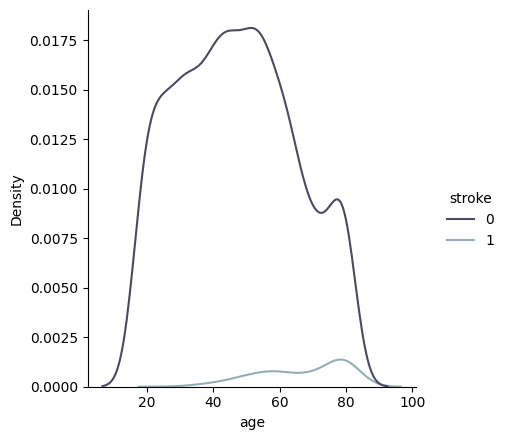

In [31]:
sns.displot(data = data_raw , x='age',hue = 'stroke',kind = 'kde',palette = 'bone',height=4.5 )
plt.show()

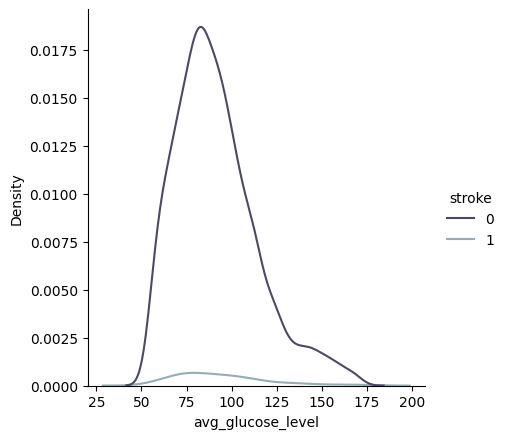

In [32]:
sns.displot(data = data_raw , x='avg_glucose_level',hue = 'stroke',kind = 'kde',palette = 'bone',height=4.5 )
plt.show()

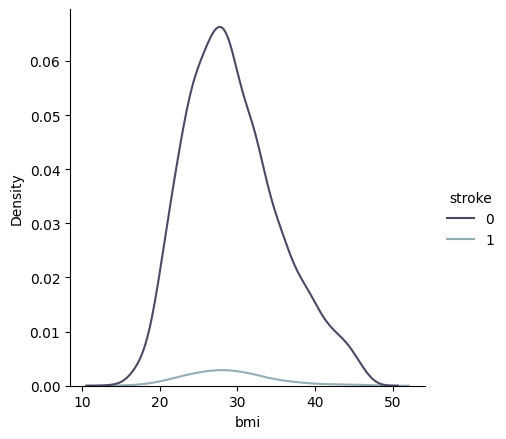

In [33]:
sns.displot(data = data_raw , x='bmi',hue = 'stroke',kind = 'kde',palette = 'bone',height=4.5 )
plt.show()

In [34]:
stroke = dict(data_raw['stroke'].value_counts())

fig = px.pie(names = stroke.keys(),values = stroke.values(),title = 'Xảy ra đột quỵ',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array([0, 1], dtype=int64),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([3363,  136], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Xảy ra đột quỵ'}}
})

## Dữ liệu mất cân bằng

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier 
from sklearn .ensemble import VotingClassifier , BaggingClassifier , StackingClassifier 

# Data Preprocessing

## Làm dữ liệu cân bằng

In [36]:
df_0 = data_raw[data_raw.iloc[:,-1]==0]
df_1 = data_raw[data_raw.iloc[:,-1]==1]

data_raw['stroke'].value_counts()

stroke
0    3363
1     136
Name: count, dtype: int64

In [37]:
df_1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
239,Male,60.0,0,1,Yes,Private,Urban,91.92,35.9,smokes,1
240,Male,66.0,0,0,Yes,Private,Rural,76.46,21.2,formerly smoked,1
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [38]:
from sklearn.utils import resample

df_1 = resample(df_1,replace=True , n_samples=df_0.shape[0] , random_state=123 )


In [39]:
df = np.concatenate((df_0,df_1))

#create the balanced dataframe
df = pd.DataFrame(df)
df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke']

# visualize balanced data 
stroke = dict(df['stroke'].value_counts())
fig = px.pie(names = ['False','True'],values = stroke.values(),title = 'Stroke Occurance',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['False', 'True'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([3363, 3363], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Stroke Occurance'}}
})

In [40]:
df['stroke'].value_counts()

stroke
0    3363
1    3363
Name: count, dtype: int64

## Encoding Data

In [41]:
df = pd.get_dummies(data =df , columns =  ['gender','ever_married','work_type','Residence_type','smoking_status'])

In [42]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,58.0,1,0,87.96,39.2,0,False,True,False,True,False,False,True,False,False,True,False,False,True,False
1,70.0,0,0,69.04,35.9,0,True,False,False,True,False,False,True,False,True,False,False,True,False,False
2,52.0,0,0,77.59,17.7,0,True,False,False,True,False,False,True,False,False,True,False,True,False,False
3,32.0,0,0,77.67,32.3,0,True,False,False,True,False,False,True,False,True,False,False,False,False,True
4,79.0,0,0,77.08,35.0,0,True,False,False,True,True,False,False,False,False,True,True,False,False,False


In [43]:
columnss = ['gender_Male','ever_married_Yes','work_type_Never_worked','work_type_Private','work_type_Self-employed'
            ,'Residence_type_Urban','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','smoking_status_Unknown',
            'Residence_type_Rural','work_type_Govt_job','ever_married_No','gender_Female']
df[columnss] = df[columnss].astype(int)


In [44]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,58.0,1,0,87.96,39.2,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
1,70.0,0,0,69.04,35.9,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
2,52.0,0,0,77.59,17.7,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
3,32.0,0,0,77.67,32.3,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
4,79.0,0,0,77.08,35.0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0


## Chia dữ liệu

In [45]:
x = df.drop('stroke',axis=1)
y = pd.to_numeric( df['stroke'])

In [46]:
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,58.0,1,0,87.96,39.2,0,1,0,1,0,0,1,0,0,1,0,0,1,0
1,70.0,0,0,69.04,35.9,1,0,0,1,0,0,1,0,1,0,0,1,0,0
2,52.0,0,0,77.59,17.7,1,0,0,1,0,0,1,0,0,1,0,1,0,0
3,32.0,0,0,77.67,32.3,1,0,0,1,0,0,1,0,1,0,0,0,0,1
4,79.0,0,0,77.08,35.0,1,0,0,1,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6721,65.0,0,0,100.98,28.2,1,0,0,1,0,0,1,0,1,0,0,1,0,0
6722,79.0,0,1,127.29,27.7,1,0,0,1,0,0,1,0,1,0,0,0,1,0
6723,74.0,0,0,72.96,31.3,0,1,0,1,0,0,1,0,0,1,0,0,0,1
6724,63.0,0,0,106.58,23.9,1,0,0,1,1,0,0,0,1,0,1,0,0,0


## Data Scaling

In [47]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [48]:
x

array([[ 0.07083505,  2.32370812, -0.30487321, ..., -0.5293085 ,
         1.20390237, -0.47941727],
       [ 0.72341334, -0.43034665, -0.30487321, ...,  1.88925739,
        -0.83063214, -0.47941727],
       [-0.2554541 , -0.43034665, -0.30487321, ...,  1.88925739,
        -0.83063214, -0.47941727],
       ...,
       [ 0.94093944, -0.43034665, -0.30487321, ..., -0.5293085 ,
        -0.83063214,  2.08586561],
       [ 0.34274267, -0.43034665, -0.30487321, ..., -0.5293085 ,
        -0.83063214, -0.47941727],
       [ 0.34274267, -0.43034665, -0.30487321, ..., -0.5293085 ,
        -0.83063214, -0.47941727]])

## Chia dữ liệu thành tập train và tập test

In [49]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = .20)

# Xây dựng mô hình

In [50]:
def results(y_actual, y_pred):
  cm = confusion_matrix(y_actual, y_pred)
  results_df = pd.DataFrame({'Actual': y_actual, 'Predicted': y_pred})

  TP = cm[1, 1]
  FP = cm[0, 1]
  TN = cm[0, 0]
  FN = cm[1, 0]

  precision_transactions = TP / (TP + FP) if (TP + FP) else 0
  recall_transactions = TP / (TP + FN) if (TP + FN) else 0
  f1_score_transactions = 2 * precision_transactions * recall_transactions / (precision_transactions + recall_transactions) if (precision_transactions + recall_transactions) else 0


  TPR = TP / (TP + FN)
  FPR = FP / (FP + TN)
  TNR = TN / (TN + FP)
  FNR = FN / (TP + FN)

  accuracy_transactions = (TP + TN) / (TP + FP + TN + FN) if (TP + FP + TN + FN) else 0
  

  print(f"Recall: {TPR}")

  print(f"Precision: {precision_transactions}")
  
  print(f"Accuracy : {accuracy_transactions}")

  print(f"F1 Score : {f1_score_transactions}")

## Decision Tree

In [51]:
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [52]:
y_pred = tree_model.predict(x_test)
results(y_test,y_pred)

Recall: 1.0
Precision: 0.9405099150141643
Accuracy : 0.9687964338781575
F1 Score : 0.9693430656934306


#### Cây quyết định cho độ chính xác khoảng 98%

## Knearest Neighbor

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = knn.predict(x_test)
results(y_test,y_pred)

Recall: 1.0
Precision: 0.9431818181818182
Accuracy : 0.9702823179791976
F1 Score : 0.9707602339181286


#### Knearest Neighbor cho độ chính xác khoảng 97%

## Support Vector Machine

In [55]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [56]:
y_pred=svm.predict(x_test)
results(y_test,y_pred)

Recall: 0.9201807228915663
Precision: 0.8358413132694938
Accuracy : 0.8714710252600297
F1 Score : 0.8759856630824373


#### SVM cho độ chính xác khoảng 88%

## Naive Bayes

In [57]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [58]:
y_pred=nb.predict(x_test)
results(y_test,y_pred)

Recall: 1.0
Precision: 0.5026495079485238
Accuracy : 0.5118870728083209
F1 Score : 0.6690176322418135


#### Navie Bayes cho độ chính xác khá thấp

## Logistic Regression

In [59]:
logic_model = LogisticRegression(penalty=None,multi_class="multinomial")
logic_model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', penalty=None)

In [60]:
y_pred=logic_model.predict(x_test)
results(y_test,y_pred)

Recall: 0.7515060240963856
Precision: 0.7316715542521994
Accuracy : 0.7414561664190193
F1 Score : 0.7414561664190192


#### Logistic regression cho độ chính xác khá thấp

## Random Forest

In [61]:
Rfcl = RandomForestClassifier()
Rfcl.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
# data_test = pd.read_csv('Test.csv')
# xa = StandardScaler()

# data_test = xa.fit_transform(data_test)
# data_test
# ytest_pred=Rfcl.predict(data_test)
# ytest_pred

In [63]:
y_pred=Rfcl.predict(x_test)
accuracy_score(y_test,y_pred)

0.9962852897473997

In [64]:
results(y_test,y_pred)

Recall: 1.0
Precision: 0.992526158445441
Accuracy : 0.9962852897473997
F1 Score : 0.9962490622655664


# So sánh hiệu suất của các mô hình

In [65]:
performance = {"Model" :["Random Forest","Decision Tree" , "K-nearist Neighbour", "SVM", "Logistic Regression" ,"Naive Bayes"],
               "Accuracy" : [0.9962,0.9843  ,0.974   ,0.883 ,0.792,0.593]}

performance = pd.DataFrame(performance)

C:\Users\ACER\AppData\Local\Temp\ipykernel_22328\3463071950.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Model', ylabel='Accuracy'>

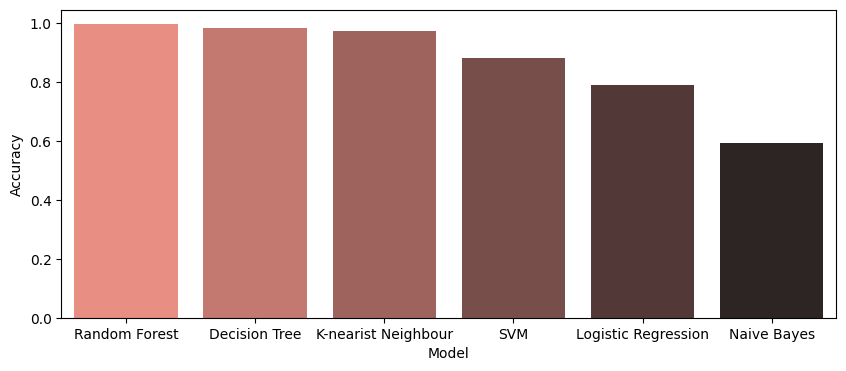

In [66]:
plt.figure(figsize=(10,4))
sns.barplot(data = performance , x = "Model" , y = "Accuracy" ,palette="dark:salmon_r")

C:\Users\ACER\AppData\Local\Temp\ipykernel_22328\3991817294.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Model', ylabel='Recall'>

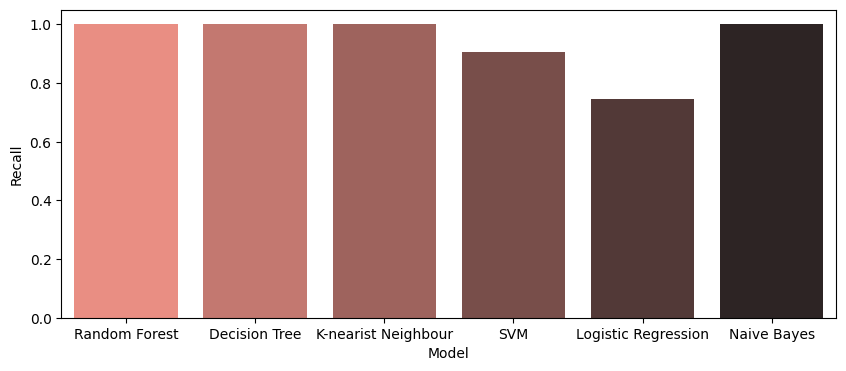

In [67]:
performance = {"Model" :["Random Forest","Decision Tree" , "K-nearist Neighbour", "SVM", "Logistic Regression" ,"Naive Bayes"],
               "Recall" : [1, 1  , 1   ,0.906 ,0.745, 1]}

performance = pd.DataFrame(performance)

plt.figure(figsize=(10,4))
sns.barplot(data = performance , x = "Model" , y = "Recall" ,palette="dark:salmon_r")

C:\Users\ACER\AppData\Local\Temp\ipykernel_22328\2694071173.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Model', ylabel='F1-Score'>

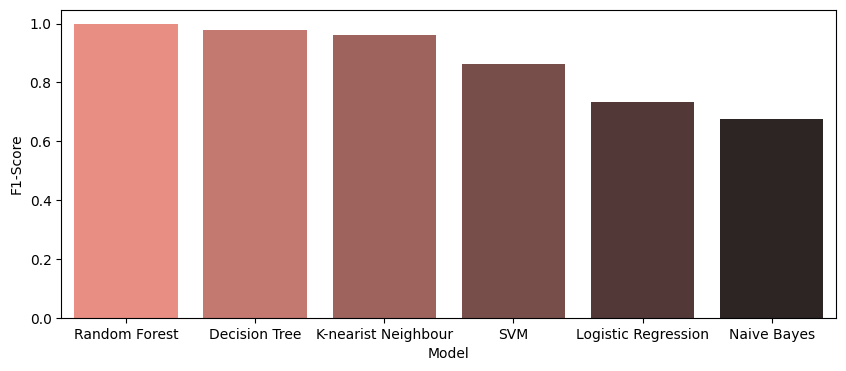

In [68]:
performance = {"Model" :["Random Forest","Decision Tree" , "K-nearist Neighbour", "SVM", "Logistic Regression" ,"Naive Bayes"],
               "F1-Score" : [0.997, 0.979  , 0.962   ,0.863 ,0.732, 0.677]}

performance = pd.DataFrame(performance)

plt.figure(figsize=(10,4))
sns.barplot(data = performance , x = "Model" , y = "F1-Score" ,palette="dark:salmon_r")

C:\Users\ACER\AppData\Local\Temp\ipykernel_22328\3809836135.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Model', ylabel='Precision'>

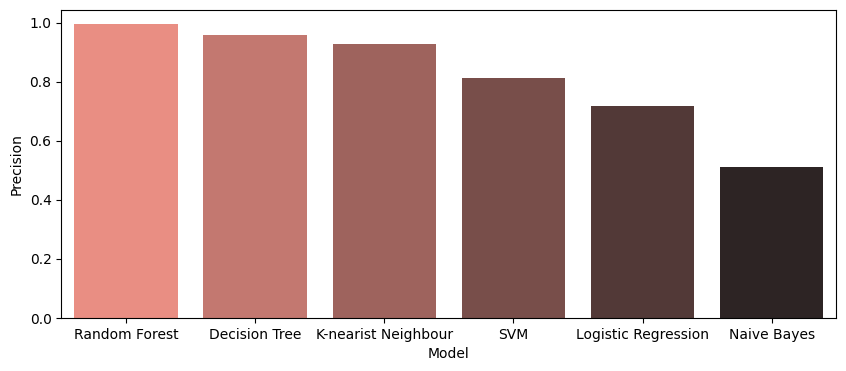

In [69]:
performance = {"Model" :["Random Forest","Decision Tree" , "K-nearist Neighbour", "SVM", "Logistic Regression" ,"Naive Bayes"],
               "Precision" : [0.994, 0.958  , 0.927   ,0.811 ,0.717, 0.512]}

performance = pd.DataFrame(performance)

plt.figure(figsize=(10,4))
sns.barplot(data = performance , x = "Model" , y = "Precision" ,palette="dark:salmon_r")